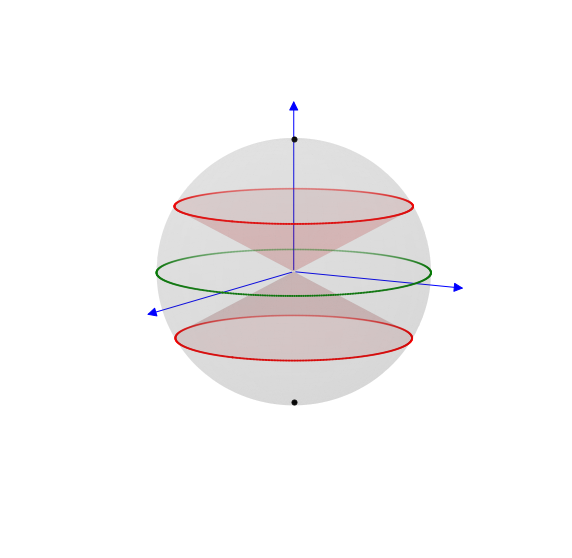

In [2]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.cm as cm

#Code for 3d arrows taken from https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=10., azim=25)
# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

#Sphere coordinates
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

#Draw arrows
a = Arrow3D([0,0], [0,0], [0,1.3], mutation_scale=20, lw=1, arrowstyle="-|>", color="b")
b= Arrow3D([0,0], [0,1.4], [0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="b")
c=Arrow3D([0,2], [0,0], [0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="b")
ax.add_artist(a)
ax.add_artist(b)
ax.add_artist(c)

#Put dots on the north and south pole
ax.plot([0], [0], [1], 'o', markersize=5, color='black')
ax.plot([0], [0], [-1], 'o', markersize=5, color='black')# use alpha=0.5 for transparency


# Draw the latitudes
def latitude(theta):
    # Make data
    u = np.linspace(0, 2 * np.pi, 500)

    #Sphere coordinates
    x = 1 * np.outer(np.cos(u), np.sin(theta))
    y = 1 * np.outer(np.sin(u), np.sin(theta))
    z = 1 * np.outer(np.ones(np.size(u)), np.cos(theta))
    return (x,y,z)

(a,b,c)=latitude(np.pi/2);ax.scatter3D(a, b, c, color='green',s=1);  
(a,b,c)=latitude(np.arccos(1/2));ax.scatter3D(a, b, c, color='red',s=1);  
(a,b,c)=latitude(np.arccos(-1/2));ax.scatter3D(a, b, c, color='red',s=1);  
#ax.plot([0, 0], [0,-np.sqrt(3)/2],zs=[0,1/2],linestyle='--',color='red')

#Data for cone
# Make data
t = np.linspace(0, 2 * np.pi, 100)
u = np.linspace(-1, 1, 100)

#Sphere coordinates
x1 = np.sin(np.pi/3)  * np.outer(np.cos(t), u)
y1= np.sin(np.pi/3) * np.outer(np.sin(t), u)
z1 = 0.5 * np.outer(np.ones(np.size(t)), u)

ax.view_init(elev=10., azim=30)
# Plot the sphere
ax.plot_surface(x, y, z, color='gray',alpha=0.1)
# Plot the cone
ax.plot_surface(x1, y1, z1, color='red',alpha=0.1)


#ax.set_aspect("equal")
plt.axis('off')
filecut="latitudes-su(2)"
fig.savefig(filecut+'.svg',bbox_inches="tight",pad_inches=0)